In [2]:
import sympy
from sympy import S, symbols, solve, solveset, limit, diff, plot, plot_implicit
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.plotting import plot3d
%matplotlib inline

## Занятие 14
## Математический анализ
## Функции нескольких переменных.
### Область определения

### Пример 1
Найти область определения функции $z = \frac{1}{\sqrt{4 - x^2 - y^2}}$.

Область определения находится из неравенства $4 - x^2 - y^2>0$, что эквивалентно $x^2 + y^2 < 2^2$ - внутренняя часть круга с центром в (0, 0) радиуса 2. Изобразим границу области на графике с помощью plot_implicit:

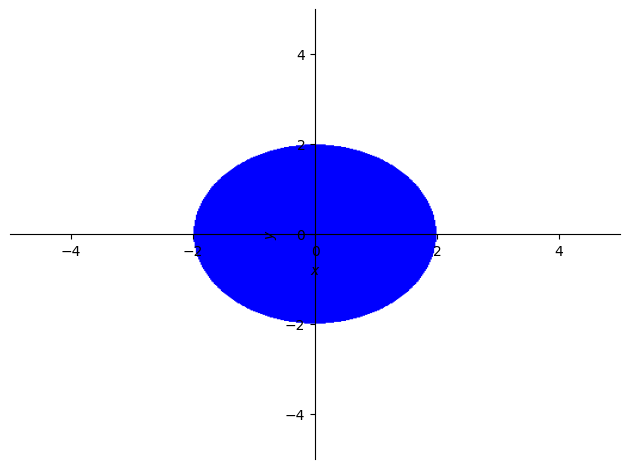

In [3]:
x, y = symbols('x y', real=True)
domainz = (4 - x**2 - y**2 > 0)
plot_implicit(domainz)

## Линии уровня
Линией уровня функции двух переменных $z = f(x, y)$ называется такая линия $f(x, y) = C$ на плоскости XOY, в точках которой функция принимает одно и то же значение $C$.
### Пример 2.
Построить линии уровня функции $z = (x - 1)^2(y + 2)$.

Уравнения линий уровня имеют вид $(x - 1)^2(y + 2) = С$. Изобразим их с помощью plot_implicit

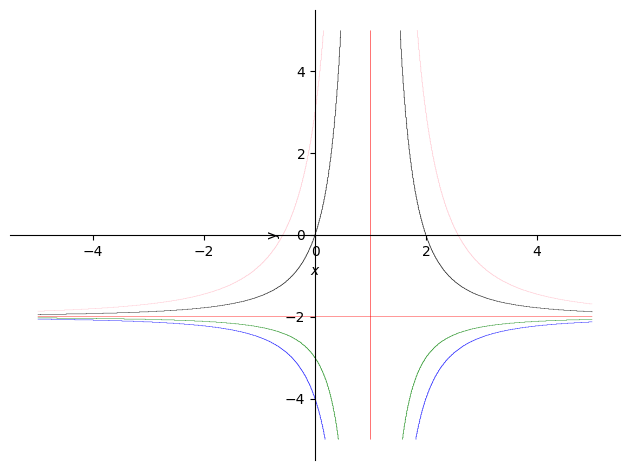

In [4]:
C = symbols('C', real=True)
def contourline(f, x, y, C):
    return sympy.Eq(f(x, y), C)
def f(x, y):
    return (x - 1)**2*(y + 2)
p = plot(ylabel='y', show=False)
for item in [(-2, 'blue'), (-1, 'green'), (0, 'red'), (2, 'black'), (5, 'pink')]:
    c, col = item
    p.append(plot_implicit(contourline(f, x, y, c), line_color=col, line_width=15, show=False)[0])
p.show()    

## Поверхности уровня
Поверхностью уровня функции трех переменных $u=f(x,y,z)$ называется такая поверхность $f(x,y,z)=C$, в точках которой функция принимает одно и то же значение $u=C$.
### Пример 3.
Найти и изобразить поверхности уровня функции $u=x^2+y^2-z^2$.

-sqrt(-c + x**2 + y**2)

sqrt(-c + x**2 + y**2)

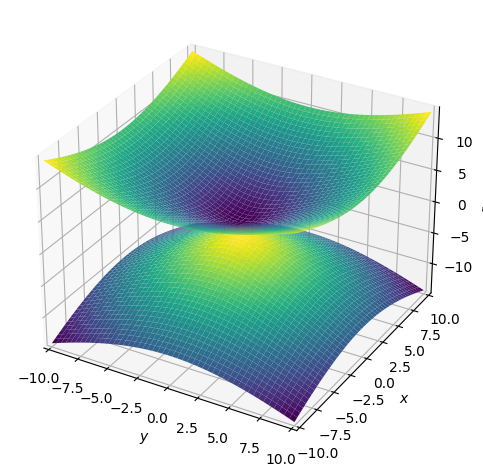

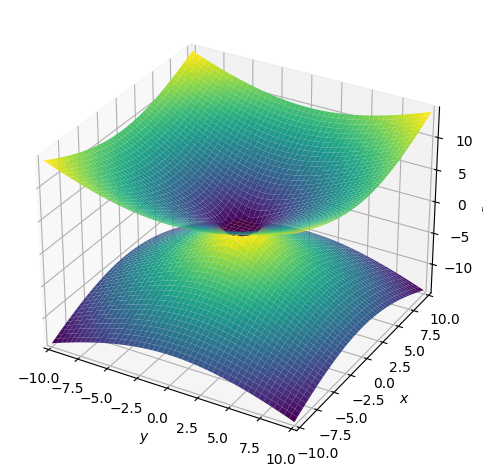

In [5]:
z, c = symbols('z c')
u = x**2 + y**2 - z**2
z12 = solve(sympy.Eq(u, c), z)
display(*z12)
plot3d(z12[0].subs(c, -2), z12[1].subs(c, -2))
plot3d(z12[0].subs(c, 2), z12[1].subs(c, 2))

### Предел функции и непрерывность.

Пределом функции $z=f(x,y)$ при стремлении точки $P'(x,y)$ к точке $P(a,b)$ называется число $A$, если для любого $\varepsilon>0$ существует такое $\delta>0$, что при $0<\rho<\delta$, где
 $\rho=\sqrt{(x-a)^2+(y-b)^2}$ --- расстояние между точками $P$ и $P'$, выполняется неравенство $|f(x,y)-A|<\varepsilon$.
 
Предел обозначается так: 
$$
\lim_{x\to a,\,y\to b} f(x,y)=A
$$

Функция $z=f(x,y)$ называется непрерывной в точке  $P(a,b)$, если
$$
\lim_{x\to a,\,y\to b} f(x,y)=f(a,b)
$$
### Пример 4. 
Найти точки разрыва функции $z=\frac1{1-x^2-y^2}$.

Точки разрыва определяются уравнением $1-x^2-y^2=0$, изобразим их на графике:

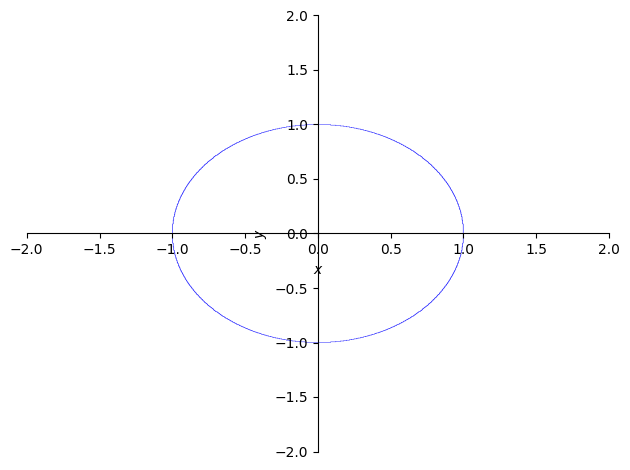

In [6]:
plot_implicit(1 - x**2 - y**2, (x, -2, 2), (y, -2, 2))

### Пример 5. 
Вычислить 
$$
\lim_{x\to 0,\,y\to 0} \frac{x}{x+y}
$$

In [7]:
f = x/(x + y)
limit(f, x, 0), limit(f, y, 0)

(0, 1)

Пределы разные, значит, предела не существует.

Вообще, в sympy можно вычислять предел только по одной переменной, так что для корректного вычисления предела о определению требуется вручную свести задачу к пределу по одной переменной $\rho$.

### Частные производные

Частная производная функции $z=f(x,y)$ по переменной $x$:
$$
\frac{\partial z}{\partial x}=\lim_{\Delta x\to 0}\frac{f(x+\Delta x,y)-f(x,y)}{\Delta x}
$$
Чтобы найти частную производную по одной из переменных, считаем остальные переменные фиксированными константами и дифференцируем по правилам для производной функции одной переменной.
### Пример 6
Найти частные производные по каждому аргументу функции $u=x^3y^2z+2x-3y+z+5$

In [8]:
u = x**3*y**2*z + 2*x - 3*y + z + 5
display(*(u.diff(t) for t in (x, y, z)))

3*x**2*y**2*z + 2

2*x**3*y*z - 3

x**3*y**2 + 1

### Однородные функции
Функция $f(x,y)$ называется однородной функцией измерения $n$, если 
для любого действительного $k$ 
$$
f(kx,ky)=k^nf(x,y).
$$
Другими словами
$$
\frac{f(kx,ky)}{f(x,y)}=k^n.
$$

### Теорема Эйлера 
Для однородной дифференцируемой функции $f(x,y)$ измерения $n$
$$
x\frac{\partial f(x,y)}{\partial x}+y\frac{\partial f(x,y)}{\partial y}=nf(x,y)
$$
### Пример 7
Проверить выполнение теоремы Эйлера для функции $f(x,y)=\ln\frac y x $.

Вначале покажем, что эта функция однородная:

In [9]:
k = symbols('k', real=True)
f = Log(y/x)
f.subs({x: k*x, y: k*y})

log(y/x)

Видим, что измерение этой однородной функции равно 0.
Проверим теорему Эйлера:

In [10]:
x*f.diff(x) + y*f.diff(y) == 0

True

### Полное приращение и полный дифференциал функции
Полное приращение функции $z=f(x,y)$ называется 
$$
\Delta z=\Delta f(x,y)=f(x+ \Delta x,y+\Delta y)-f(x,y)
$$
Полный дифференциал $dz$ функции $z=f(x,y)$ - главная часть приращения $\Delta z$, линейная отностиельно $\Delta x$ и $\Delta y$. Полный дифференциал $dz$ находится по формуле
$$
d z=\frac{\partial z}{\partial x} dx+\frac{\partial z}{\partial y} dy
$$
В случае функции трех переменных $u=f(x,y,z)$:
$$
d u=\frac{\partial u}{\partial x} dx+\frac{\partial u}{\partial y} dy+\frac{\partial u}{\partial z} dz
$$

### Пример 8
Найти полный дифференциал функции $z=yx^y$.

In [11]:
z = y*x**y
dx, dy = symbols('dx dy')
dz = z.diff(x)*dx + z.diff(y)*dy
dz

dx*x**y*y**2/x + dy*(x**y*y*log(x) + x**y)